# Alex AI/ML Training V3

Testing approach from https://www.sciencedirect.com/science/article/pii/S0021929018304354
Estimation of vertical ground reaction force during running using neural network model and uniaxial accelerometer



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16924225627222200377
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1176895488
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5564957581981398486
physical_device_desc: "device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


I0000 00:00:1733126017.336616 1656024 gpu_device.cc:2022] Created device /device:GPU:0 with 1122 MB memory:  -> device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
#directory path
dir_path = "/home/alexbeat/data/kuopio-gait-dataset-ml"
input_path = f"{dir_path}/_main-input.csv"
output_path = f"{dir_path}/_main-output.csv"

In [4]:
x_og = pd.read_csv(input_path, index_col=0)  # 49 input features
y_og = pd.read_csv(output_path, index_col=0)   # 3 output features (x, y, z)

x_og.drop(columns=['time'], inplace=True)
y_og.drop(columns=['time'], inplace=True)


num_rows = 100000
x = x_og[:num_rows]
y = y_og[:num_rows]

In [5]:
print(x.head())

   pelvis_imu_acc_0  pelvis_imu_acc_1  pelvis_imu_acc_2  tibia_r_imu_acc_0  \
0          9.761505         -0.539103          1.818704          12.697140   
1         10.134969         -0.911804          1.594711          10.897347   
2         10.385214         -1.351347          1.155096           9.525765   
3         10.543116         -1.864298          0.684864           9.072569   
4         10.660259         -2.339200          0.291542           9.549234   

   tibia_r_imu_acc_1  tibia_r_imu_acc_2  femur_r_imu_acc_0  femur_r_imu_acc_1  \
0          16.125368           6.755737           6.553590          -9.642062   
1          16.414892           6.965524           7.794528          -8.131455   
2          14.627335           5.945245           8.543280          -7.183258   
3          11.909804           4.448972           8.545444          -6.877351   
4          10.364927           3.148921           7.764376          -6.626254   

   femur_r_imu_acc_2  tibia_l_imu_acc_0  ...

In [6]:
print(y_og.head())
print(y.head())

       f2_1      f2_2       f2_3
0 -0.678967  0.748046  -7.150059
1 -0.721937  1.238132  -9.194256
2 -0.582924  1.809044 -10.333972
3 -0.132954  2.361078  -9.370096
4  0.781994  2.707438  -4.607854
       f2_1      f2_2       f2_3
0 -0.678967  0.748046  -7.150059
1 -0.721937  1.238132  -9.194256
2 -0.582924  1.809044 -10.333972
3 -0.132954  2.361078  -9.370096
4  0.781994  2.707438  -4.607854


In [7]:
scalerX = StandardScaler()
X = scalerX.fit_transform(x)

# Y = y
scalerY = StandardScaler()
Y = scalerY.fit_transform(y)
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (100000, 49)
Y shape: (100000, 3)


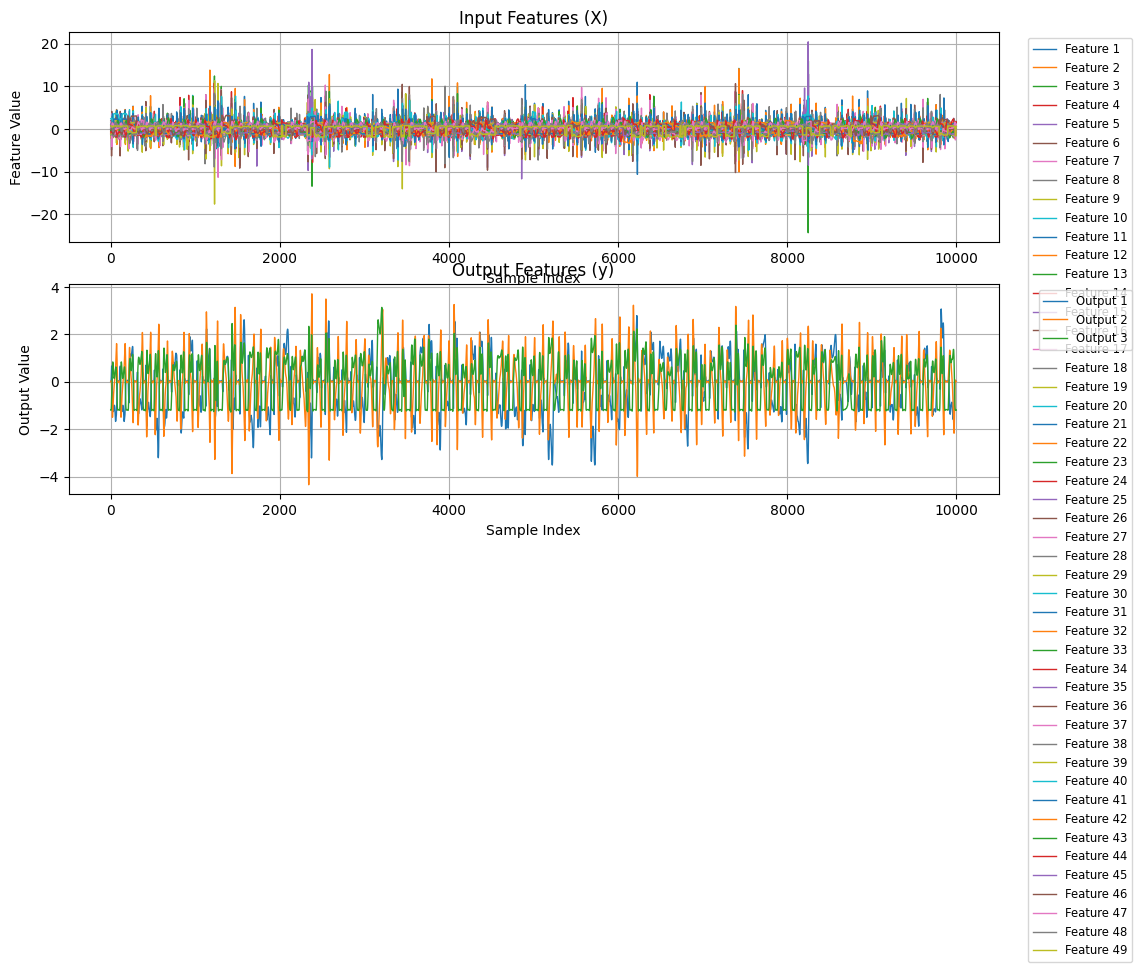

In [8]:
# Create a figure
plt.figure(figsize=(12, 6))

graph_window = 10000
# Plotting the input features (X)
plt.subplot(2, 1, 1)
for i in range(X.shape[1]):  # Loop through each feature (column)
    plt.plot(X[:graph_window, i], label=f'Feature {i+1}', linewidth=1)
plt.title('Input Features (X)')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

# Plotting the output features (y)
plt.subplot(2, 1, 2)
for i in range(Y.shape[1]):  # Loop through each output feature (column)
    plt.plot(Y[:graph_window, i], label=f'Output {i+1}', linewidth=1)
plt.title('Output Features (y)')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

plt.show()

![nn-architecture.png](nn-architecture.png)

In [33]:
model = Sequential()

model.add(Input(shape=(49,)))  # Using Input layer

# Input layer and first hidden layer
model.add(Dense(10, activation='sigmoid'))

# Second hidden layer
model.add(Dense(100, activation='linear'))

# Output layer
model.add(Dense(3, activation='linear'))  # Linear activation for regression

In [34]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,903 (7.43 KB)

 Trainable params: 1,903 (7.43 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
model.fit(X, Y, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6043 - mae: 0.5800 - val_loss: 0.2842 - val_mae: 0.3899
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3432 - mae: 0.4160 - val_loss: 0.2508 - val_mae: 0.3583
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - loss: 0.3054 - mae: 0.3870 - val_loss: 0.2365 - val_mae: 0.3478
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 0.2922 - mae: 0.3755 - val_loss: 0.2290 - val_mae: 0.3413
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - loss: 0.2791 - mae: 0.3664 - val_loss: 0.2191 - val_mae: 0.3299
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2737 - mae: 0.3604 - val_loss: 0.2151 - val_mae: 0.3287
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2697 - mae: 0.3580 - val_loss: 0.2140 - val_mae: 0.3262
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - loss: 0.2659 - mae: 0.3544 - val_loss: 0.2136 - val_mae: 0.3271
Epoch 9/100
1250/1250 ━━

In [36]:
x_text_path = f"{dir_path}/input/01-l_comf_01-input.csv"
y_text_path = f"{dir_path}/output/01-l_comf_01-output.csv"
X_test = pd.read_csv(x_text_path, index_col=0)  # 49 input features
y_test = pd.read_csv(y_text_path, index_col=0)   # 3 output features (x, y, z)
X_test.drop(columns=['time'], inplace=True)
y_test.drop(columns=['time'], inplace=True)

# Normalize test data
X_test = scalerX.transform(X_test)
y_test = scalerY.transform(y_test)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1260 - mae: 0.8424
Test Loss: 0.9146003127098083, Test MAE: 0.7324254512786865


In [37]:
predictions = model.predict(X_test)
print(predictions)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[-0.87678146  0.3614458   0.76081896]
 [-0.87338144  0.36312157  0.7592935 ]
 [-0.877927    0.36082128  0.76261383]
 ...
 [-0.68541634  0.37781686  0.6304271 ]
 [-0.69630873  0.38425174  0.65221566]
 [-0.7014302   0.3907132   0.6570543 ]]


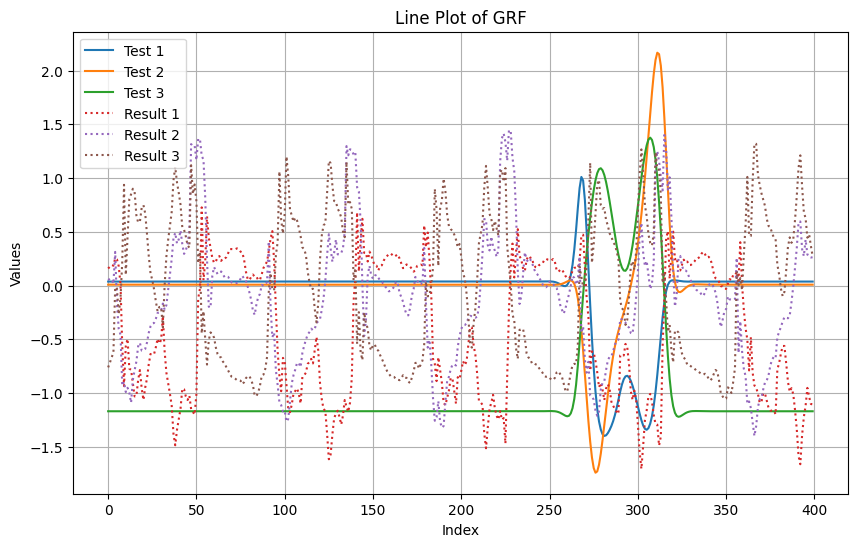

In [38]:
# Plotting the DataFrame
plt.figure(figsize=(10, 6))

min_window = 300
max_window = 700

for i in range(y_test.shape[1]):  # Loop over the number of columns
    plt.plot(y_test[min_window:max_window, i], label=f'Test {i+1}')  # Use marker for visibility

# Plot each column as a separate line
for i in range(predictions.shape[1]):  # Loop over the number of columns
    plt.plot(predictions[min_window:max_window, i], label=f'Result {i+1}', linestyle=':')  # Use marker for visibility

# Adding titles and labels
plt.title('Line Plot of GRF')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
# plt.yscale('log')  # Optional: Use logarithmic scale for better visibility of small values
plt.show()

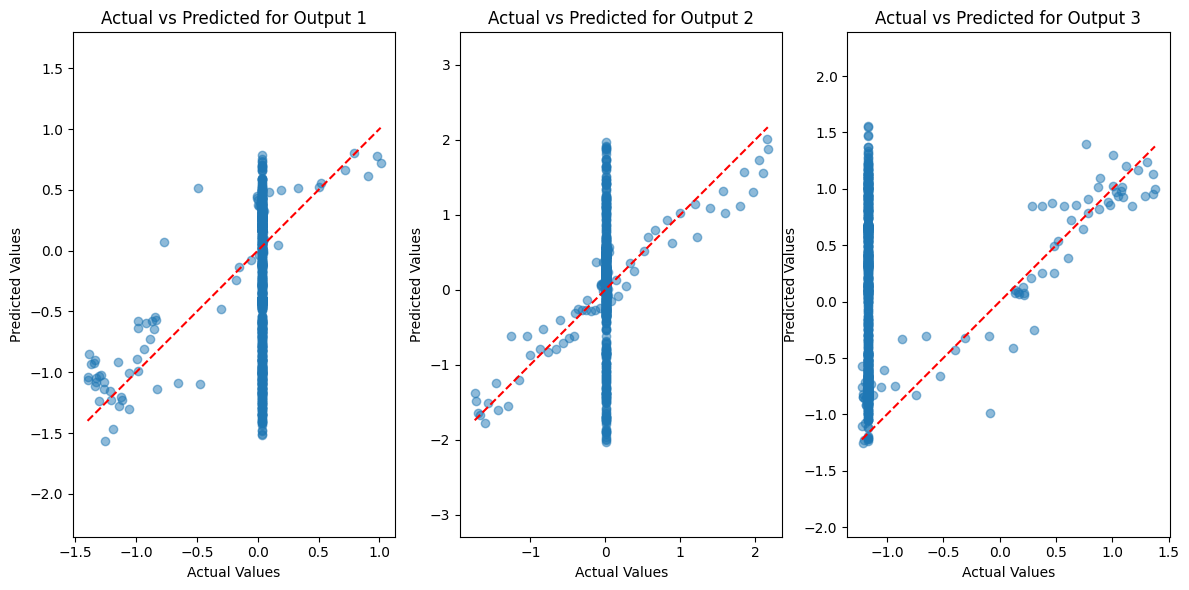

In [30]:
# Create a figure
plt.figure(figsize=(12, 6))
actual_values = y_test
predicted_values = predictions

# Plot actual vs predicted for each output (x, y, z)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(actual_values[:, i], predicted_values[:, i], alpha=0.5)
    plt.plot([actual_values[:, i].min(), actual_values[:, i].max()],
             [actual_values[:, i].min(), actual_values[:, i].max()], 'r--')  # Diagonal line
    plt.title(f'Actual vs Predicted for Output {i+1}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')

plt.tight_layout()
plt.show()